<a href="https://colab.research.google.com/github/norayehia/Machine-learning-kafka-data/blob/main/norakfk2n2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#problem2 static part

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#Read data from csv file static iot data 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/aics/assinm2/iot_static_data.csv')

In [ ]:
df

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,...,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Source,Class
0,19.570634,152.679121,39991.937640,20.937891,150.455024,38960.674060,23.168006,145.454142,3.695422e+04,33.115077,123.515434,27655.538890,62.619034,102.471926,15409.868150,19.570634,152.679121,39991.937640,20.937891,150.455024,38960.674060,23.168006,145.454142,3.695422e+04,33.115077,123.515434,27655.538890,62.619034,102.471926,15409.868150,18.885473,156.041505,2.027804e+02,349.823034,1.602610e+05,-2.956340e+04,-3.704318e-01,20.044037,154.488822,200.790831,...,30.034811,5.307252,1.298518e+02,4.880738,181.620841,227.548005,291.835506,59579.844560,1.744788e+04,0.446623,4.927844,181.698241,2.275817e+02,291.280119,5.957891e+04,1.779382e+04,4.556339e-01,4.975746,181.767997,227.609424,290.719232,5.957503e+04,1.814181e+04,0.464725,4.997565,181.796886,2.276200e+02,290.465036,5.957232e+04,1.829905e+04,4.688430e-01,4.999756,181.799689,2.276210e+02,290.439555,5.957202e+04,1.831480e+04,4.692557e-01,Provision PT 838 Security Camera,BENIGN
1,49.893840,169.297843,54532.338720,62.957476,169.735104,54283.995040,82.340884,168.919514,5.344982e+04,98.214224,164.300338,51038.672810,124.460107,146.697496,42083.223280,49.893840,169.297843,54532.338720,62.957476,169.735104,54283.995040,82.340884,168.919514,5.344982e+04,98.214224,164.300338,51038.672810,124.460107,146.697496,42083.223280,49.886530,169.313860,2.335350e+02,295.273638,9.040787e+04,-2.457803e+03,-3.919336e-02,62.898830,169.837418,233.073744,...,97.549007,1.686998,6.319929e+01,1.980432,69.960478,3.999805,101.835497,15.998438,0.000000e+00,0.000000,1.988213,69.976286,3.999930e+00,101.846358,1.599944e+01,0.000000e+00,0.000000e+00,1.996055,69.992095,3.999992,101.857221,1.599994e+01,0.000000e+00,0.000000,1.999605,69.999210,4.000000e+00,101.862109,1.600000e+01,0.000000e+00,0.000000e+00,1.999960,69.999921,4.000000e+00,101.862598,1.600000e+01,0.000000e+00,0.000000e+00,Provision PT 737E Security Camera,BENIGN
2,1.996527,449.011775,409.365474,2.002395,448.141152,739.076602,2.166552,419.128740,1.103949e+04,4.621621,278.780846,34237.687910,29.401508,286.241737,32040.668620,1.996527,449.011775,409.365474,2.002395,448.141152,739.076602,2.166552,419.128740,1.103949e+04,4.621621,278.780846,34237.687910,29.401508,286.241737,32040.668620,1.996402,449.036043,1.999997e+01,449.036043,3.999987e+02,0.000000e+00,0.000000e+00,1.997840,449.021626,19.999988,...,14.978833,10.667405,2.061570e+02,1.996402,449.036043,19.999968,449.036043,399.998701,0.000000e+00,0.000000,1.997840,449.021626,1.999999e+01,449.021626,3.999995e+02,0.000000e+00,0.000000e+00,1.999279,449.007209,19.999999,449.007209,3.999999e+02,0.000000e+00,0.000000,2.428558,450.295009,2.008146e+01,450.295009,4.032651e+02,0.000000e+00,0.000000e+00,14.978833,455.354366,1.959295e+01,455.354366,3.838837e+02,0.000000e+00,0.000000e+00,Samsung SNH 1011 N Webcam,BENIGN


#preproceeesing 

#encode label with label encodening 

It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical label

In [ ]:
#import category_encoders as ce
from sklearn import preprocessing

# encode categorical variables with ordinal encoding

encoder1 = preprocessing.LabelEncoder()
encoder =preprocessing.LabelEncoder()

#encoder.fit(df.Source)
encoder1.fit(df.Class)
#df.Source = encoder.transform(df.Source)
df.Class = encoder1.transform(df.Class)

#drop sorce column because it  give values in kafka not in static  make the accuracy not good

In [ ]:
def preprocessing_df(c):

  
   
   c.drop(['Source'], axis='columns', inplace=True)
   return c

In [ ]:
df.isnull().sum().max()

0

AFTER READING DATA CHECK IF NULL VALUES

In [ ]:
df = df.fillna(0)

In [ ]:
df.isnull().sum().max()

0

In [ ]:
df=preprocessing_df(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25609 entries, 0 to 25608
Columns: 116 entries, MI_dir_L5_weight to Class
dtypes: float64(115), int64(1)
memory usage: 22.7 MB


In [ ]:
pip install category_encoders

     |████████████████████████████████| 82 kB 379 kB/s 


In [ ]:

from sklearn.model_selection import train_test_split


#X = df.drop(['Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Label'],axis=1)
X = df.drop(['Class'],axis=1)
y =df['Class']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=.20,random_state=42)
print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(Y_train.shape))
print("shape of Y Test :"+str(Y_test.shape))

shape of X Train :(20487, 115)
shape of X Test :(5122, 115)
shape of Y Train :(20487,)
shape of Y Test :(5122,)


#first algorithm is random forest 
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees,in tunning
when using randomstate with zero is like randomstate with 2 give me better accuracy .99 so i leve it random_state=2
AND ACCORDING TO CONFUSTION MATRIX CLASS NUM1 IS MIS CLASSFIED FP IS HIGHER

In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=2)



# fit the model

rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

In [ ]:
y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9990


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[4444    0    0    0    0    0    0    0    0    0    0]
 [   0    0    2    1    0    0    0    0    0    0    0]
 [   0    0   63    0    0    0    0    0    0    0    0]
 [   0    0    0   41    0    0    0    0    0    0    0]
 [   0    0    0    0   46    1    0    0    0    0    0]
 [   0    0    0    0    0   79    0    0    0    0    0]
 [   0    0    0    0    0    0   21    0    0    0    0]
 [   0    0    0    0    0    0    0   22    0    0    0]
 [   0    0    0    0    0    0    0    0   21    0    0]
 [   0    0    0    0    0    0    0    0    0  380    0]
 [   0    0    0    0    0    0    1    0    0    0    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


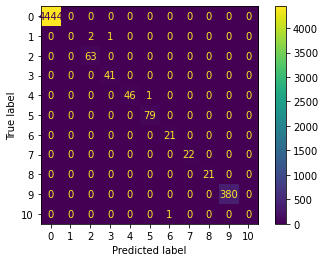

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rfc, X_test, Y_test)
plt.show()

show that the model recognize first type of classes better but theother is less

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4444
           1       0.00      0.00      0.00         3
           2       0.97      1.00      0.98        63
           3       0.98      1.00      0.99        41
           4       1.00      0.98      0.99        47
           5       0.99      1.00      0.99        79
           6       0.95      1.00      0.98        21
           7       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00       380
          10       0.00      0.00      0.00         1

    accuracy                           1.00      5122
   macro avg       0.81      0.82      0.81      5122
weighted avg       1.00      1.00      1.00      5122



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#second classfier

 MLPClassifier trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters. when tunning mlp with randomstate 1,max iteraton 300  give me .90 accracy // it give me .88 accuracy when tunng with random state 7 and max iteration 100 so its better with 300

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train)

In [ ]:
y_predm = clf.predict(X_test)

from sklearn.metrics import accuracy_score

# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(Y_test, y_predm)))

Model accuracy score with doors variable removed : 0.8965


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_predm))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4444
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        63
           3       0.97      0.73      0.83        41
           4       0.00      0.00      0.00        47
           5       0.45      1.00      0.62        79
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00        22
           8       0.00      0.00      0.00        21
           9       0.67      0.38      0.49       380
          10       0.00      0.00      0.00         1

    accuracy                           0.90      5122
   macro avg       0.27      0.28      0.26      5122
weighted avg       0.87      0.90      0.88      5122



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_predm)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[4338    0   37    1    0    8    0    0    0   60    0]
 [   3    0    0    0    0    0    0    0    0    0    0]
 [  63    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0   30    0   10    0    0    0    0    0]
 [   0    0    0    0    0   47    0    0    0    0    0]
 [   0    0    0    0    0   79    0    0    0    0    0]
 [  12    0    0    0    0    0    0    0    0    9    0]
 [   0    0    0    0    0   22    0    0    0    0    0]
 [  12    0    0    0    0    9    0    0    0    0    0]
 [ 235    0    0    0    0    0    0    0    0  145    0]
 [   0    0    0    0    0    0    0    0    0    1    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


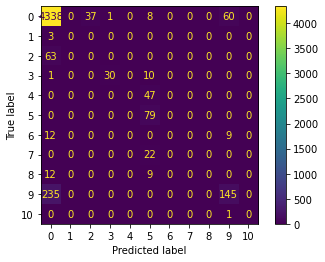

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, Y_test)
plt.show()

show that the model recognize first type of classes better but theother is less

#Dynamic part

In [ ]:
!pip install kafka-python

     |████████████████████████████████| 246 kB 5.5 MB/s 


#kafka

*fistly define  list  dat []
,make loop 100000 to get data packets append it to it after using

ast.literal_eval: Safely evaluate an expression node or a string containing a Python literal or container display. The string or node provided may only consist of the following Python literal structures: strings, bytes, numbers, tuples, lists, dicts, sets, booleans, None, bytes and sets

https://stackoverflow.com/questions/15197673/using-pythons-eval-vs-ast-literal-eval*

In [ ]:
import time
import ast
from numpy import nan
#inf=math.inf

# Import the python Consumer Client for Kafka
from kafka import KafkaConsumer

# instantiate the KafkaConsumer Class using the arguments mentioned.
# do not change any arguments other than the first positional argument.
consumer = KafkaConsumer(
    'task2',   # change this to "task2" for the IOT Botnet Detection  ---- important ----
    bootstrap_servers="34.130.121.39:9092",
    sasl_plain_username="student",
    sasl_plain_password="uottawa",
    security_protocol="SASL_PLAINTEXT",
    sasl_mechanism="PLAIN",
    auto_offset_reset='earliest',
    enable_auto_commit=False
)

i = 1
dat=[]
for message in consumer:
    print(f"Consuming the {i+1}th data packet!")
    
    data_packet = message.value
    try:
      data_packet=ast.literal_eval(data_packet.decode("utf-8"))
    except ValueError:
      continue
    dat.append(data_packet)  
#     print(data_packet)
    
 ##############################################
    
    if i == 100000:
        break
        
    i += 1

 

Streaming output truncated to the last 5000 lines.
Consuming the 95002th data packet!
Consuming the 95003th data packet!
Consuming the 95004th data packet!
Consuming the 95005th data packet!
Consuming the 95006th data packet!
Consuming the 95007th data packet!
Consuming the 95008th data packet!
Consuming the 95009th data packet!
Consuming the 95010th data packet!
Consuming the 95011th data packet!
Consuming the 95012th data packet!
Consuming the 95013th data packet!
Consuming the 95014th data packet!
Consuming the 95015th data packet!
Consuming the 95016th data packet!
Consuming the 95017th data packet!
Consuming the 95018th data packet!
Consuming the 95019th data packet!
Consuming the 95020th data packet!
Consuming the 95021th data packet!
Consuming the 95022th data packet!
Consuming the 95023th data packet!
Consuming the 95024th data packet!
Consuming the 95025th data packet!
Consuming the 95026th data packet!
Consuming the 95027th data packet!
Consuming the 95028th data packet!
Cons

#preprocessing
drop sorce column because it give me worse accuracy like zero because it come with different values

In [ ]:

ts=pd.DataFrame(dat)

In [ ]:
ts = ts.fillna(0)

In [ ]:
ts=preprocessing_df(ts)

In [ ]:
df.isnull().sum().max()

0

In [ ]:
import category_encoders as ce

# encode categorical variables with ordinal encoding
#ts.Source = encoder.transform(ts.Source)
ts.Class = encoder1.transform(ts.Class)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

from sklearn.model_selection import train_test_split


#X = df.drop(['Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Label'],axis=1)
Xt = ts.drop(['Class'],axis=1)
yt =ts['Class']

#predict on all 100000  with the static model

In [ ]:
y_pred =rfc.predict(Xt)

from sklearn.metrics import accuracy_score

# Check accuracy score s = 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(yt, y_pred)))

Model accuracy score with doors variable removed : 0.9992


In [ ]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yt, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[86836     0     0     0     2     3     0     0     0     0     0]
 [    0    22    25     0     0     0     0     0     0     0     0]
 [    9     0  1579     4     0     0     0     0     0     0     0]
 [    2     0     0   781     0     0     0     0     0     0     0]
 [    2     0     0     0   860    19     0     0     0     0     0]
 [    1     0     0     0     0  1673     0     0     0     0     0]
 [    0     0     0     1     0     0   327     0     0     0     0]
 [    0     0     0     1     0     0     0   405     0     0     0]
 [    0     0     0     0     0     0     0     0   450     0     0]
 [    1     0     0     0     0     0     0     0     0  6941     0]
 [    0     0     0     0     0     0     9     0     0     1    46]]


#predict with static on every 1000

In [ ]:
import category_encoders as ce
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


1_Try to make to see what the model do with every 1000 of the records 100000
with 1000*i)-1000:(1000*i
 in the first iteration take 0*1000 -1000  then repeate to take the second 1000

 then the model on stake data will predict on it

 2_then make list to append 25000 every iteration drop 1000 from it then  take 1000 record the above to it 
 so100 iteration

In [ ]:
lists=[]
accuracy1=[]
f1score1=[]
for i in range(1,100):
  X22 = ts[(1000*i)-1000:(1000*i)].drop(['Class'],axis=1)
  y22 = ts[(1000*i)-1000:(1000*i)]['Class']
  y_pred33 = rfc.predict(X22)
  encoder = ce.OrdinalEncoder()
  y_pred33 = encoder.fit_transform(y_pred33)
  accuracy1.append(accuracy_score(y22, y_pred33))
  f1score1.append(f1_score(y22, y_pred33, average='weighted'))
  
  #take the 1000 record from the data
  df.drop(df.head(1000).index, inplace=True)
  #then replace it with 1000 from kafka
  #in the first iteration take 0*1000 -1000 
  df=df.append(ts[(1000*i)-1000:(1000*i)],ignore_index=True)
  Window=df.copy()
  #print(len(df))
  #lists.append(Window)
  lists.append(df)

make dictionary has accuracy and f1score to make it easy to convert to dataframme 

In [ ]:
m_dict = {'Accuarcy1': accuracy1, 'f1_score1': f1score1}
dfv1 = pd.DataFrame(m_dict)

In [ ]:
dfv1

,Accuarcy1,f1_score1
0,0.999,0.998983
1,0.998,0.997091
2,0.998,0.997500
3,0.999,0.998997
4,1.000,1.000000
...,...,...
94,1.000,1.000000
95,0.999,0.999005
96,1.000,1.000000
97,0.998,0.998024


the accuracy ranges from .99 to 1 on the graph  whichvshow that the rondomforest give better result on it

plot the result so i have thia result 

Text(0.5, 1.0, 'accuracy graph vs f1score')

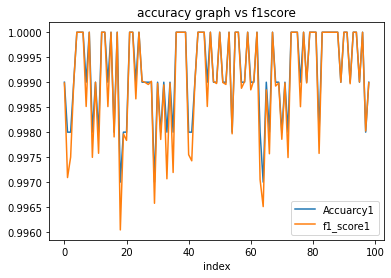

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
ax=plt.gca()
dfv1.reset_index().plot(kind='line',x='index',y='Accuarcy1',ax=ax)
dfv1.reset_index().plot(kind='line',x='index',y='f1_score1',ax=ax)
plt.title("accuracy graph vs f1score")

Text(0.5, 1.0, 'f1score graph')

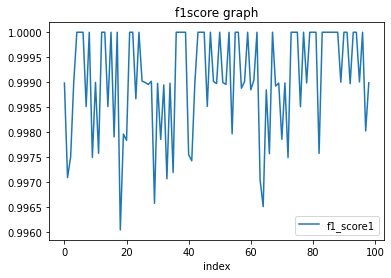

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
ax=plt.gca()
#dfv1.reset_index().plot(kind='line',x='index',y='Accuarcy1',ax=ax)
dfv1.reset_index().plot(kind='line',x='index',y='f1_score1',ax=ax)
plt.title("f1score graph")

the accuracy is less and f1score so we go to windowing  replace 100 0 fro the static with 1000 from kfka then after fit on it predict on alll 100000

#to make model with window fiting on it not static

To chek lenght of window is the same of static

In [ ]:
lists=[]
for i in range(1,100):
  #take the 1000 record from the data
  df.drop(df.head(1000).index, inplace=True)
  #then replace it with 1000 from kafka
  #in the first iteration take 0*1000 -1000 
  df=df.append(ts[(1000*i)-1000:(1000*i)],ignore_index=True)
  Window=df.copy()
  print(len(df))
  #lists.append(Window)
  lists.append(df)

25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609
25609


the accurcy and f1score is better on beginng then it decreASE BUT IT GOOD ALSO .99 AND 1

#2 TRY TO PREDICT ON EVERY 1000 WITH THAT MODEL  BIT FITING MODEL NOW NOT ON STATIC BUT ON THE window 250000 >24000 static and 1000 change dynamic  with adaptive modeling random forest

In [ ]:
from sklearn.metrics import f1_score
accuracy2 = []
f1score2 = []
for i in range(1,len(lists)):

  df2 = pd.DataFrame(lists[i])
  df2.replace([np.inf, -np.inf], np.nan, inplace=True)
  df2 = df2.fillna(0)
  XX = df2.drop(['Class'],axis=1)
  yy = df2['Class']
  #print(XX)
  rfc.fit(XX,yy)
  for j in range(1,100):
      X2 = ts[(1000*j)-1000:(1000*j)].drop(['Class'],axis=1)
      y2 = ts[(1000*j)-1000:(1000*j)]['Class']
      y_pred33 = rfc.predict(X2)
      encoder = ce.OrdinalEncoder()


  y_pred33 = encoder.fit_transform(y_pred33)
  accuracy2.append(accuracy_score(y2, y_pred33))
  f1score2.append(f1_score(y2, y_pred33, average='weighted'))

In [ ]:
m_dict22 = {'Accuarcy2': accuracy2, 'f1_score2': f1score2}

In [ ]:
df22 = pd.DataFrame(m_dict22)

In [ ]:
df22

,Accuarcy2,f1_score2
0,0.999,0.998988
1,0.999,0.998988
2,0.999,0.998988
3,0.999,0.998988
4,0.999,0.998988
...,...,...
93,0.999,0.998988
94,0.999,0.998988
95,0.999,0.998988
96,0.999,0.998988


Text(0.5, 1.0, 'accuracy graph')

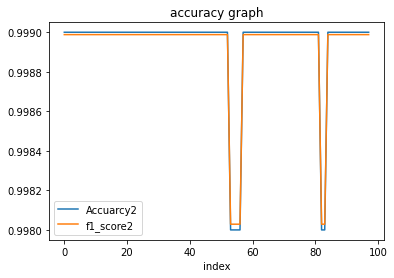

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
ax=plt.gca()
df22.reset_index().plot(kind='line',x='index',y='Accuarcy2',ax=ax)
df22.reset_index().plot(kind='line',x='index',y='f1_score2',ax=ax)
plt.title("accuracy graph")

Text(0.5, 1.0, 'all static Vs adaptive graph')

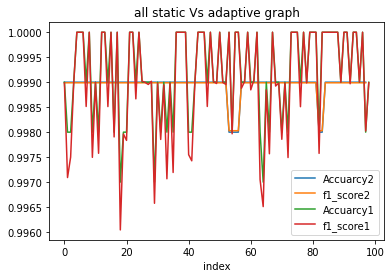

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
ax=plt.gca()
#df.reset_index().plot(kind='line',x='index',y='Accuarcy',ax=ax)
df22.reset_index().plot(kind='line',x='index',y='Accuarcy2',ax=ax)
df22.reset_index().plot(kind='line',x='index',y='f1_score2',ax=ax)
dfv1.reset_index().plot(kind='line',x='index',y='Accuarcy1',ax=ax)
dfv1.reset_index().plot(kind='line',x='index',y='f1_score1',ax=ax)
plt.title("all static Vs adaptive graph")

SNDOMFOREST IS BETTER ON THIS PROBLEM ACCORDING TO ACCURACY AND F1SCORE on muiltyclafssfier also IT GIVE ME BETTER RESULT 
1 but mlp give .90 accuracy on Static data show that RANDOMFOREST is better on this problem according to f1score and accuracy and 
confusion matrix the fp for the classes decreases,when predict on every 1000 from 100000 in iteration the accuracy ranges from .99 to be 1 
now which is better performance 
.THE MODEL GIVE BETTER RESULT WHEN REMOVE SORCE COLUMN SO ITS BETTER TO ANALYZE DATA TO KNOW IF IT CONTAIN COLUMN THAT 
MAKE RESULT WORSE